In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Activation,Dense, Flatten,BatchNormalization,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import RMSprop,Adam

import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [ ]:
base_dir = '/content/drive/My Drive/CNN xray/data/xray'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir,'test')

In [ ]:
train_normal_dir = os.path.join(train_dir, 'normal')
train_pneumonia_dir = os.path.join(train_dir,'pneumonia')


validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_pneumonia_dir = os.path.join(validation_dir, 'pneumonia')

test_normal_dir = os.path.join(test_dir,'normal')
test_pneumonia_dir = os.path.join(test_dir,'pneumonia')

In [ ]:
train_normal_fnames = os.listdir( train_normal_dir )
train_pneumonia_fnames = os.listdir( train_pneumonia_dir )
#print(train_normal_fnames[:10])
#print(train_pneumonia_fnames[:10])

In [ ]:
print('total training normal images:',len(os.listdir( train_normal_dir)))
print('total training pneumonia images',len(os.listdir( train_pneumonia_dir)))


print('total validation normal images:',len(os.listdir(validation_normal_dir)))
print('total validation pneumonia imamges:',len(os.listdir(validation_pneumonia_dir)))

print('total test normal images:',len(os.listdir(test_normal_dir)))
print('total test pneumonia images:',len(os.listdir(test_pneumonia_dir)))

total training normal images: 1342
total training pneumonia images 3876
total validation normal images: 9
total validation pneumonia imamges: 9
total test normal images: 234
total test pneumonia images: 390


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
nrows = 4
ncols = 4
pic_index = 0

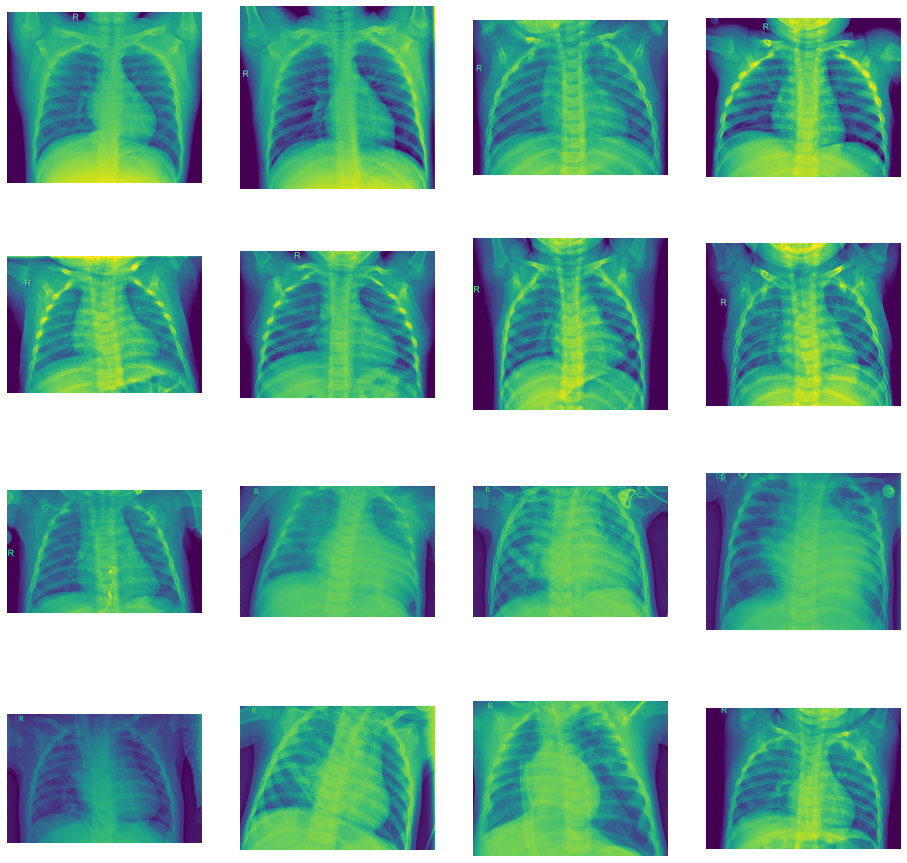

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index+=8

next_normal_pic = [os.path.join(train_normal_dir,fname)
                   for fname in train_normal_fnames[ pic_index-8:pic_index]]

next_pneumonia_pic = [os.path.join(train_pneumonia_dir,fname)
                      for fname in train_pneumonia_fnames[pic_index-8:pic_index]]

for i , img_path in enumerate(next_normal_pic+next_pneumonia_pic):
    
    sp = plt.subplot(nrows,ncols,i +1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [ ]:
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range = 0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
val_datagen  = ImageDataGenerator( rescale = 1.0/255.)

test_datagen = ImageDataGenerator(rescale= 1./255.)



#reshape to 150 by 150 for our CNN

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    class_mode='binary',
                                                    color_mode='grayscale',
                                                    target_size=(150, 150))     

validation_generator =  val_datagen.flow_from_directory(validation_dir,
                                                         batch_size=1,
                                                         class_mode='binary',
                                                         color_mode='grayscale',
                                                         target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=64,
                                                  class_mode='binary',
                                                  color_mode='grayscale',
                                                  target_size = (150, 150)
                                                  )

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=81,
                              epochs=100,
                              validation_steps=16,
                              verbose=2)

Epoch 1/100
81/81 - 62s - loss: 0.1311 - accuracy: 0.9499 - val_loss: 0.4198 - val_accuracy: 0.8125
Epoch 2/100
81/81 - 61s - loss: 0.1384 - accuracy: 0.9484 - val_loss: 0.9882 - val_accuracy: 0.6250
Epoch 3/100
81/81 - 61s - loss: 0.1340 - accuracy: 0.9484 - val_loss: 0.9899 - val_accuracy: 0.6875
Epoch 4/100
81/81 - 62s - loss: 0.1369 - accuracy: 0.9480 - val_loss: 0.7929 - val_accuracy: 0.6875
Epoch 5/100
81/81 - 62s - loss: 0.1264 - accuracy: 0.9507 - val_loss: 0.8629 - val_accuracy: 0.6875
Epoch 6/100
81/81 - 62s - loss: 0.1325 - accuracy: 0.9482 - val_loss: 0.6280 - val_accuracy: 0.6875
Epoch 7/100
81/81 - 62s - loss: 0.1299 - accuracy: 0.9484 - val_loss: 0.7882 - val_accuracy: 0.6875
Epoch 8/100
81/81 - 61s - loss: 0.1282 - accuracy: 0.9515 - val_loss: 0.7619 - val_accuracy: 0.6875
Epoch 9/100
81/81 - 62s - loss: 0.1278 - accuracy: 0.9490 - val_loss: 0.8838 - val_accuracy: 0.6250
Epoch 10/100
81/81 - 62s - loss: 0.1324 - accuracy: 0.9493 - val_loss: 0.9678 - val_accuracy: 0.6250

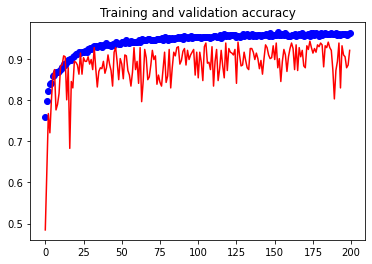

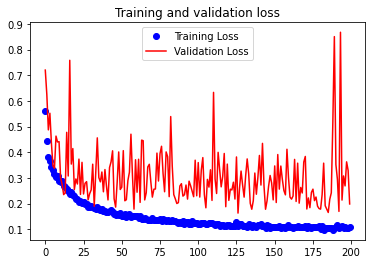

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
model.evaluate(test_generator)

10/10 [==============================] - 5s 505ms/step - loss: 0.2361 - accuracy: 0.9087


[0.23610249161720276, 0.9086538553237915]

In [ ]:
predictions = model.predict(test_generator)

In [ ]:
y_pred2 = np.where(predictions > 0.2,1,0)
test_label = test_generator.classes
cm = confusion_matrix(y_true =test_label ,y_pred = y_pred2)

Confusion matrix, without normalization
[[ 56 178]
 [ 88 302]]


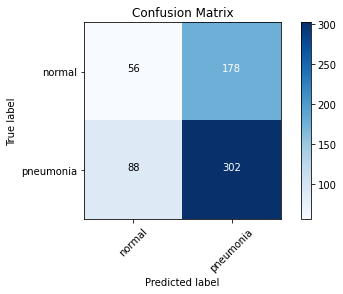

In [ ]:
cm_plot_labels = ['normal','pneumonia']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
tn,fp,fn,tp = cm.ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*(recall*precision / (recall + precision))
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print(f1_score)

Recall of the model is 0.77
Precision of the model is 0.63
0.6942528735632184


In [ ]:
model.save('/content/drive/My Drive/CNN xray/data/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/CNN xray/data/assets


In [ ]:
model2.evaluate(test_generator)

10/10 [==============================] - 5s 464ms/step - loss: 0.3298 - accuracy: 0.8846


[0.3298403024673462, 0.8846153616905212]